# This is the code to plot the PCAs from PCA coordinates that were calculated in R.

The original sleuth function to plot PCAs was outdated due to newer versions 

The PC coordinates can be found for both hourly and daily datasets in the 'hourly_pca_coords.csv' and 'daily_pca_coords.csv' which are in the same directory.

The variance explained by each PC can be found in 'hourly_pca_results.txt' and 'daily_pca_results.txt'.

Uncomment the lines starting with fig.savefig to download the figures in high-res PNGs.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
hourly_coords = pd.read_csv('hourly_pca_coords.csv', index_col=0)
hourly_pc1 = 9.130e-01
hourly_pc2 = 5.350e-02

hourly_coords.head()

,PC1,PC2,sample,condition,time
1,-2.594548e+05,-196155.367144,pre_1,pre_vaccination,1
2,-4.750780e+05,-190865.859384,pre_2,pre_vaccination,2
3,-5.302121e+05,-79431.841739,pre_3,pre_vaccination,3
4,-1.346147e+06,-87259.338193,pre_4,pre_vaccination,4
5,-1.127022e+06,-27044.712489,pre_5,pre_vaccination,5


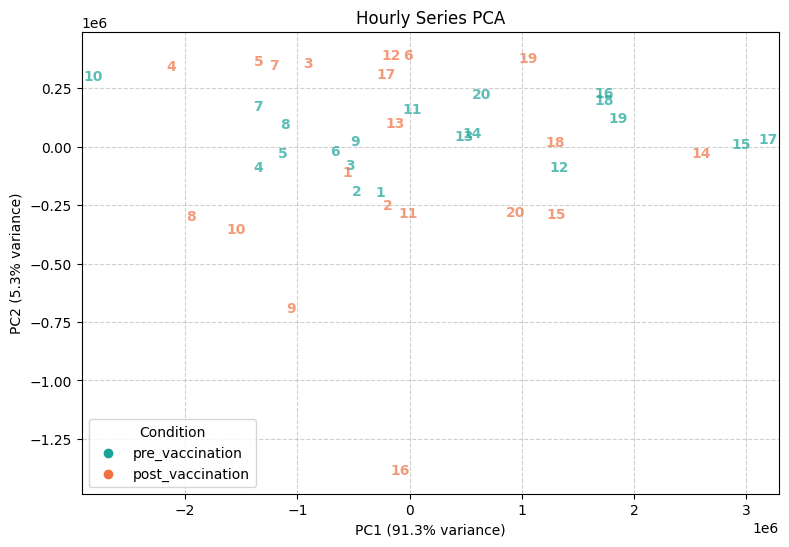

In [35]:
# Explained variance (replace these with actual values)
explained_variance_ratio = [91.3, 5.35]  # Example percentages for PC1 and PC2

# Define colors for conditions
color_map = {'pre_vaccination': '#17A398', 'post_vaccination': '#F07142'}

# Create the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.set_xlim(min(hourly_coords["PC1"]) - 100000, max(hourly_coords["PC1"]) + 100000)
ax.set_ylim(min(hourly_coords["PC2"]) - 100000, max(hourly_coords["PC2"]) + 100000)


# Scatter plot with text labels instead of markers
for _, row in hourly_coords.iterrows():
    ax.text(row['PC1'], row['PC2'], row['time'], 
            color=color_map[row['condition']], fontsize=10, fontweight='bold', alpha=0.7,
            ha='center', va='center')

# Labels with variance contribution
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.1f}% variance)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.1f}% variance)')
ax.set_title('Hourly Series PCA')

# Add a legend for conditions
for condition, color in color_map.items():
    ax.scatter([], [], color=color, label=condition)  # Empty scatter for legend
ax.legend(title="Condition")

# Grid and layout adjustments
ax.grid(True, linestyle='--', alpha=0.6)

# Uncomment the line below to download figure
#fig.savefig('hourly_pca.png', dpi=300)

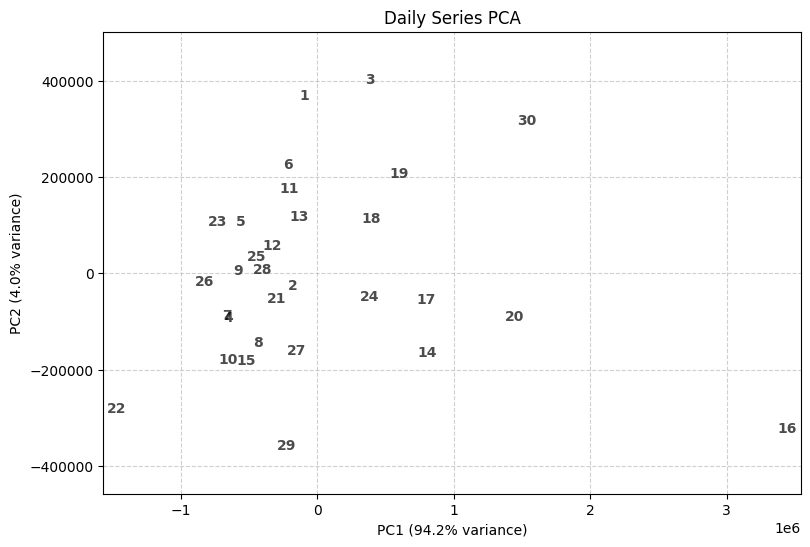

In [32]:
daily_coords = pd.read_csv('daily_pca_coords.csv', index_col=0)

# Explained variance (replace these with actual values)
explained_variance_ratio = [94.15, 4.001]  # Example percentages for PC1 and PC2

# Create the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.set_xlim(min(daily_coords["PC1"]) - 100000, max(daily_coords["PC1"]) + 100000)
ax.set_ylim(min(daily_coords["PC2"]) - 100000, max(daily_coords["PC2"]) + 100000)


# Scatter plot with text labels instead of markers
for _, row in daily_coords.iterrows():
    ax.text(row['PC1'], row['PC2'], int(row['time']), 
            color='black', fontsize=10, fontweight='bold', alpha=0.7,
            ha='center', va='center')

# Labels with variance contribution
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.1f}% variance)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.1f}% variance)')
ax.set_title('Daily Series PCA')

# Grid and layout adjustments
ax.grid(True, linestyle='--', alpha=0.6)
#plt.show()
#fig.savefig('daily_pca.png', dpi=300)

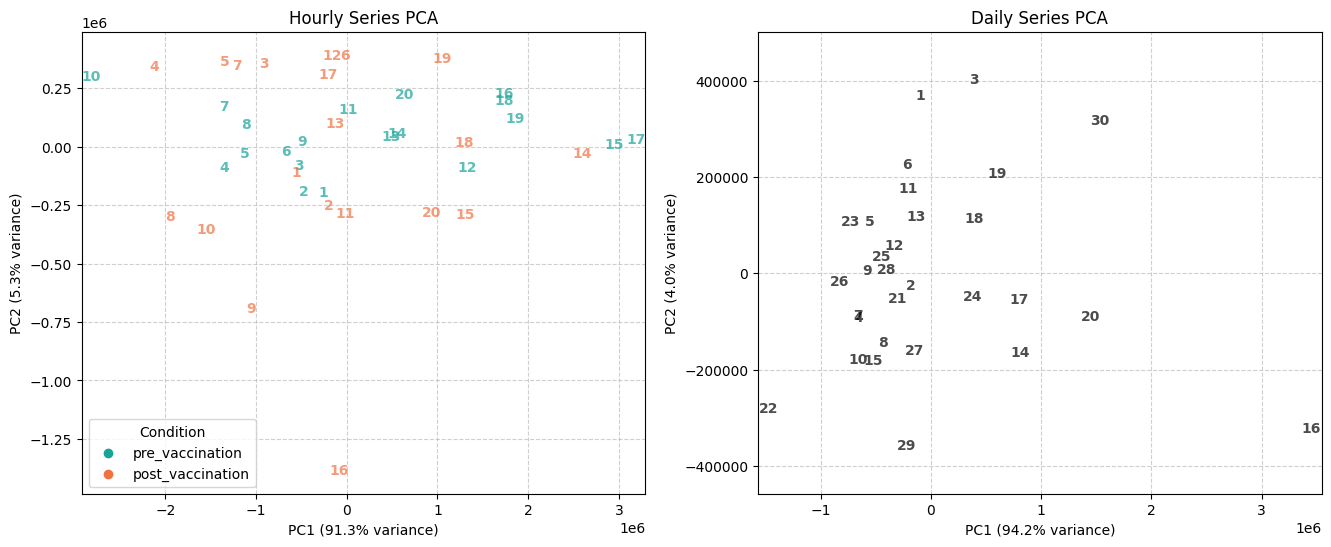

In [34]:
# Exactly the same script above, but in a subplot (for manuscript)

# Explained variance (replace these with actual values)
hourly_variance_ratio = [91.3, 5.35]  # Example percentages for PC1 and PC2

# Define colors for conditions
color_map = {'pre_vaccination': '#17A398', 'post_vaccination': '#F07142'}

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(16,6))


ax[0].set_xlim(min(hourly_coords["PC1"]) - 100000, max(hourly_coords["PC1"]) + 100000)
ax[0].set_ylim(min(hourly_coords["PC2"]) - 100000, max(hourly_coords["PC2"]) + 100000)


# Scatter plot with text labels instead of markers
for _, row in hourly_coords.iterrows():
    ax[0].text(row['PC1'], row['PC2'], row['time'], 
            color=color_map[row['condition']], fontsize=10, fontweight='bold', alpha=0.7,
            ha='center', va='center')

# Labels with variance contribution
ax[0].set_xlabel(f'PC1 ({hourly_variance_ratio[0]:.1f}% variance)')
ax[0].set_ylabel(f'PC2 ({hourly_variance_ratio[1]:.1f}% variance)')
ax[0].set_title('Hourly Series PCA')

# Add a legend for conditions
for condition, color in color_map.items():
    ax[0].scatter([], [], color=color, label=condition)  # Empty scatter for legend
ax[0].legend(title="Condition")

# Grid and layout adjustments
ax[0].grid(True, linestyle='--', alpha=0.6)


daily_variance_ratio = [94.15, 4.001]  # Example percentages for PC1 and PC2

# Create the plot
#fig, ax = plt.subplots(figsize=(9,6))
ax[1].set_xlim(min(daily_coords["PC1"]) - 100000, max(daily_coords["PC1"]) + 100000)
ax[1].set_ylim(min(daily_coords["PC2"]) - 100000, max(daily_coords["PC2"]) + 100000)


# Scatter plot with text labels instead of markers
for _, row in daily_coords.iterrows():
    ax[1].text(row['PC1'], row['PC2'], int(row['time']), 
            color='black', fontsize=10, fontweight='bold', alpha=0.7,
            ha='center', va='center')

# Labels with variance contribution
ax[1].set_xlabel(f'PC1 ({daily_variance_ratio[0]:.1f}% variance)')
ax[1].set_ylabel(f'PC2 ({daily_variance_ratio[1]:.1f}% variance)')
ax[1].set_title('Daily Series PCA')

# Grid and layout adjustments
ax[1].grid(True, linestyle='--', alpha=0.6)
#fig.savefig('both_pcas.png', dpi=300)